In [1]:
# Import needed libraries to get data from URL and load into Pandas DF
import os
import tarfile
import urllib
import pandas as pd

# Define url and OS path that I want to save csv data under
DATA_URL = "https://raw.githubusercontent.com/JacobBRodriguez/SJSU/master/Fall%202020/DataSets/avocado.csv"


DATA_PATH = os.path.join("/Users/Do-While/Desktop/SJSU/Classes/SJSU/Fall 2020", "DataSets")

# Function to get data from URL and return it as Pandas dataframe
def fetch_and_load_from_url(data_url, data_path, txt_file_name):
    
    # If no data path exists, create directory
    if not os.path.isdir(data_path):
        os.makedirs(data_path)
    # create text document path under OS path
    txt_path = os.path.join(data_path, txt_file_name)
    # Using URL, request data and return to created path
    urllib.request.urlretrieve(data_url, txt_path)
    # Read in text file, convert csv to pandas df and return upon close of file
    with open(txt_path, "r") as file:
        return pd.read_csv(file)

# Creating 1 dataframes
avo_df = fetch_and_load_from_url(DATA_URL, DATA_PATH, "avocado.txt")
avo_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


## 1) Train and test the data (assume you mean split into train and test)

In [2]:
# First need to convert string data to numerical so that I can pass it into the model

from sklearn import preprocessing

# Need to do column preprocessing so that can use model
# Converting column to String so that can perform label encoding
avo_df["type"] = avo_df["type"].astype(str)
avo_df["region"] = avo_df["region"].astype(str)
avo_df["Date"] = avo_df["Date"].astype(str)

# Doing label encoding so that model can have its float values

# Creating label encoding object
label_encoder = preprocessing.LabelEncoder()

# Selecting column to be transformed
type_data = avo_df["type"]
region_data = avo_df["region"]
date_data = avo_df["Date"]

# Fitting and transforming string values to unique ints based on their current value
type_trans = label_encoder.fit_transform(type_data)
region_trans = label_encoder.fit_transform(region_data)
date_trans = label_encoder.fit_transform(date_data)

# Adding transformed array in place of original data
avo_df["type"] = type_trans
avo_df["region"] = region_trans
avo_df["Date"] = date_trans
avo_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,150,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1,111,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2,72,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,3,33,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,4,160,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,17,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,8,151,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,9,112,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,10,73,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [3]:
# Drop first column because it is just a local index per region
avo_df.drop(columns=["Unnamed: 0"], inplace=True)
avo_df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,150,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,111,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,72,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,33,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,160,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,17,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,151,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,112,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,73,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [4]:
# Separate the data into X and Y - AveragePrice will be our label
Y = avo_df[['AveragePrice']]
X = avo_df.drop(columns=["AveragePrice"], inplace=False)

In [70]:
# Split the data into training and test datasets - large dataset so only doing 20 percent testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)

## 2) Perform feature engineering

In [71]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Scaling the training and test features using 
stan_scale = preprocessing.StandardScaler()
X_scale_train = stan_scale.fit_transform(X_train)
X_scale_test = stan_scale.fit_transform(X_test)
X_scale_train

array([[-0.08309177, -0.24627665, -0.23117202, ...,  0.99815227,
        -1.22905365, -0.34812809],
       [ 0.06058183, -0.24618055, -0.23262587, ...,  0.99815227,
        -0.16108423, -0.66768657],
       [-1.02723259, -0.18279603, -0.22622886, ...,  0.99815227,
         1.97485462, -0.73159827],
       ...,
       [ 1.08682185, -0.18681178, -0.16307582, ..., -1.00185116,
        -0.16108423,  0.73837075],
       [ 0.79947465, -0.05908993, -0.12557561, ..., -1.00185116,
         0.90688519,  1.05792923],
       [-0.67831098, -0.14346101, -0.09212832, ..., -1.00185116,
        -1.22905365, -0.85942166]])

Text(0, 0.5, 'Explained Variance %')

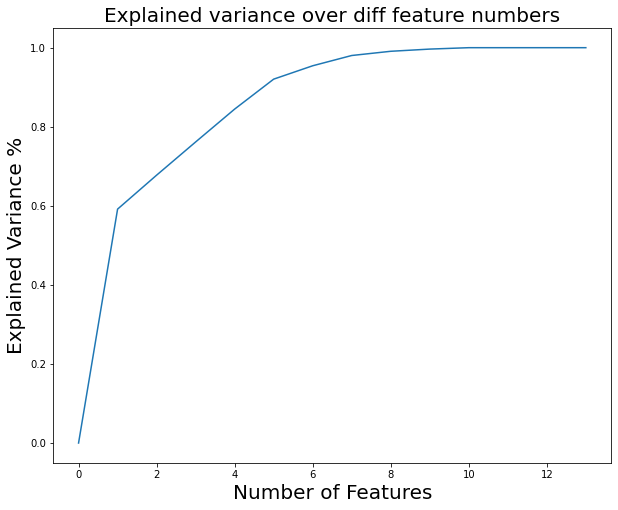

In [72]:
# Check if can do PCA
from sklearn.decomposition import PCA
pca = PCA()
decomposed_vectors = pca.fit_transform(X_scale_train)

num_features = list(range(0, 14, 1))
variance = [sum(pca.explained_variance_ratio_[:num])/sum(pca.explained_variance_ratio_) for num in num_features]
fig, ax = plt.subplots(1, figsize=(10,8))

ret = plt.plot(num_features, variance)
ax.set_title("Explained variance over diff feature numbers", fontsize=20)
ax.set_xlabel("Number of Features", fontsize=20)
ax.set_ylabel("Explained Variance %", fontsize=20)

## 3) What features are the most correlated?

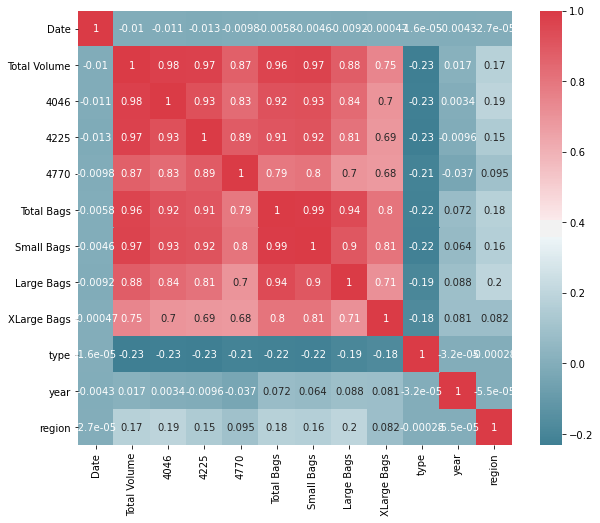

In [73]:
# Creating heatmap of original Feature data to get correlations
import seaborn as sns
# Creating figure and axis
fig, ax = plt.subplots(figsize=(10,8))
# Plotting correlation matrix as a heatmap for better visualization of results
sns.heatmap(X.corr(), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, annot=True)
plt.show()

- Seeing a strong correlation between Total Bags and Small Bags and also those two with Large Bags
- Also seeing a strong relationship with the number Columns with Total Volume
- It's really looking like most of the Bags are connected with the Volume side and number Columns.

## 4 & 5) Build a model and use XGBoost

In [74]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error as MSE

# Get the x data values and keep the y labeled data as is for functional transformation
dtrain = xgb.DMatrix(data=X_train.values, label=y_train)
dtest = xgb.DMatrix(data=X_test.values)

In [75]:
# Making the model itself

# Max depth of a given tree is capped at 3 to help with overfitting (potentially)
param = {'max_depth': 3}
# Managing the learning rate by setting the feature weights impact on future boosting steps
param["eta"] = 0.6
# Minimum loss reduction required to make more partitions of leaf nodes of tree. Higher being more conservative
param["gamma"] = 5
# Have to set the objective to linear regression with squared loss
param["objective"] = "reg:squarederror"


# Training model
# Setting the number of training rounds
num_rounds = 100

model = xgb.train(params=param, dtrain=dtrain, num_boost_round=num_rounds)

In [76]:
# Running predictions on the model
y_predict = model.predict(dtest)

## 6) Fine-tune the parameters

In [147]:
# Max depth of a given tree is capped at 10 to help with overfitting (potentially)
param = {'max_depth': 10}
# Managing the learning rate by setting the feature weights impact on future boosting steps
# Shrinks the feature weights to make the boosting process more conservative
param["eta"] = 0.2
# Minimum loss reduction required to make more partitions of leaf nodes of tree. Higher being more conservative
param["gamma"] = 0.1
# The minimum number of instances that need to be in each child node - larger means more conservative
param['min_child_weight'] = 2
# Percentage amount that XGBoost will randomly sample from the training data before growing trees. Lower to address overfitting
param['subsample'] = 0.9
# L2 regularization parameter - higher being more conservative
param['lambda'] = 10
# L1 regularization parameter - higher being more conservative
param['alpha'] = 0.1
# Control the balance of positive and negative weights - good for unbalanced classes which mine somewhat exhibits with norms
param['scale_pos_weight'] = 0

# Have to set the objective to linear regression with squared loss
param["objective"] = "reg:squarederror"


# Training model
# Setting the number of training rounds
num_rounds = 100

model = xgb.train(params=param, dtrain=dtrain, num_boost_round=num_rounds)

### On fine-tuning:
- Basic process was to go down the line for each parameter and see which values helped create a lower RMSE score
- I arrived at a slightly deeper tree but not run wild tree, meaning that there was potential for some overfitting otherwise
- Kept the ETA lower since the model seemed to want to overfit otherwise. This slight change from the default gave better results
- The Gamma was very lower but still had some threshold greater than 0. We wanted to keep a threshold for minimum loss but the model did well with a lower threshold
- The min child weight wasn't changed too much but having at least one more occurance of a child in a node made the model better than just having a single instance
- Subsampling helped address some overfitting going on but at a lower percentage value it was hurting performance. Wanted to catch some overfitting but was creating too much bias if lower than that amount.
- L2 regularization had a better say in model performance than L1 because it allowed for some regularization to overfitting but didn't make the coeffiencents go to zero. Between the two, it was more aparent that shrinkage was better than complete zeroing out.
- Turns out that scaling of the positive weights with the default of one was actually giving a more unbalanced weight distribution. By getting rid of that bias, I was able to improve the performance a little bit.

- The object is the loss function I chose to go with over the default method. Both are near the same.

## 7) Evaluate the performance of your model

In [149]:
import numpy as np
from sklearn.metrics import mean_squared_error as MSE 

y_pred = np.round(y_predict, 2)
# RMSE Computation 
rmse = np.sqrt(MSE(y_test, y_pred)) 
print("RMSE : % f" %(rmse)) 

RMSE :  0.133843


## 8) Explain in detail what is happening inside your model.

For my model, I have set specific hyperparameters noted above, but the overall idea of what is happening inside the model is that it is building multiple decision trees in parallel to arrive at a final tree. The model didn't need too much regularization alterations as seen above because it has built-in regularization with its boosting trees made off of estimations of the previous tree. I made this model with some regularization hyperparameters set but not really to high levels. There were some key hyperparameters like keeping the maximum tree depth to 10 and shrinking the future weights that were used for further boosting. I think those really helped with overfitting the model. I was able to get through many rounds of testing with different parameters due to the fast nature of the model training - building trees in parallel. I believe I arrived at a good model after some hyperparameter tuning.